---

# 수치형 변수 데모

In [61]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [62]:
from matplotlib import rcParams, pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from warnings import simplefilter

In [63]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
simplefilter('ignore')

# 학습데이터 로드

In [64]:
data_dir = Path('C:/python/DACON_DATA')
trn_file = data_dir / 'train.csv'
seed = 42

In [65]:
df = pd.read_csv(trn_file, index_col=0)
print(df.shape)
df.head()

(320000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.263956,20.336773,19.009500,17.672439,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,18,18,1.189764,1.190681,1.188979,1.189355,1.190206,0
1,15.052147,14.061969,13.452418,13.268450,13.168941,0.004506,14.96642,14.00452,13.41139,13.23625,13.13468,1,1,1.253254,1.257836,1.248762,1.250997,1.255533,1
2,16.786385,15.825426,15.536318,15.393535,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,2,2,1.022499,1.024105,1.020983,1.021730,1.023291,0
3,25.660638,21.188727,20.221158,19.894949,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,4,3,1.205399,1.206058,1.204874,1.205120,1.205712,0
4,24.453429,20.699170,19.042368,18.324152,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,13,12,1.193946,1.194285,1.193738,1.193826,1.194099,0


# EDA

In [66]:
df.info() # 결측값 X

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 0 to 319999
Data columns (total 19 columns):
u            320000 non-null float64
g            320000 non-null float64
r            320000 non-null float64
i            320000 non-null float64
z            320000 non-null float64
redshift     320000 non-null float64
dered_u      320000 non-null float64
dered_g      320000 non-null float64
dered_r      320000 non-null float64
dered_i      320000 non-null float64
dered_z      320000 non-null float64
nObserve     320000 non-null int64
nDetect      320000 non-null int64
airmass_u    320000 non-null float64
airmass_g    320000 non-null float64
airmass_r    320000 non-null float64
airmass_i    320000 non-null float64
airmass_z    320000 non-null float64
class        320000 non-null int64
dtypes: float64(16), int64(3)
memory usage: 48.8 MB


In [7]:
df.describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000
mean,19.852429,18.376837,17.735761,17.174226,16.875187,0.058308,19.628874,18.227087,17.615434,17.152347,16.869277,6.332700,6.138816,1.175763,1.176528,1.175131,1.175430,1.176128,1.116322
std,1.945548,31.110759,1.466242,52.561464,57.146264,0.575457,1.923586,17.786568,1.473020,25.075760,35.436549,8.881129,8.551634,0.116297,0.118065,0.114723,0.115485,0.117156,0.923455
min,-17.687512,-17555.365606,7.731354,-23955.817764,-23955.817764,-166.048260,-42.837530,-9999.000000,-16.380230,-9999.000000,-9999.000000,1.000000,1.000000,1.000059,1.000012,1.000157,1.000105,1.000027,0.000000
25%,18.724150,17.474851,16.877190,16.523876,16.288890,0.000036,18.563598,17.348370,16.787138,16.453048,16.234063,1.000000,1.000000,1.088220,1.088448,1.087763,1.088021,1.088299,0.000000
50%,19.419439,18.140528,17.525850,17.149736,16.917610,0.047129,19.264635,18.022410,17.443415,17.087370,16.869390,2.000000,2.000000,1.179350,1.179235,1.179375,1.179377,1.179303,1.000000
75%,20.432092,19.073172,18.428089,18.007435,17.728924,0.094597,20.197603,18.888443,18.291078,17.906960,17.655653,5.000000,5.000000,1.227540,1.225990,1.229236,1.228599,1.226757,2.000000
max,58.623328,46.338272,72.009662,50.164052,52.612664,62.323343,30.777850,30.613170,31.957200,32.016220,30.781270,44.000000,42.000000,2.050775,2.080287,2.022134,2.036329,2.065390,2.000000


In [8]:
target_col = 'class'
pred_col = 'pred'
num_cols = [x for x in df.columns if df[x].dtype in [np.int64, np.float64] and x != target_col]
print(num_cols)

['u', 'g', 'r', 'i', 'z', 'redshift', 'dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z', 'nObserve', 'nDetect', 'airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z']


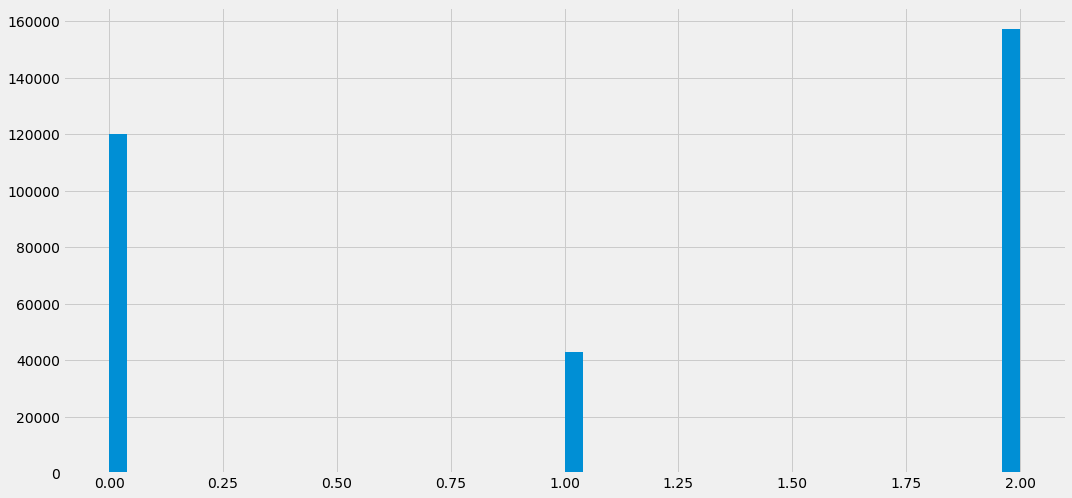

In [11]:
df['class'].hist(bins=50)

In [13]:
sns.pairplot(data=df, vars=num_cols + [target_col])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000018A4BBE5D38> (for post_execute):


KeyboardInterrupt: 

In [14]:
df.corr().style.background_gradient() #상관관계 표현

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
u,1,0.0486209,0.818125,0.0174659,0.0141987,-0.00924279,0.935217,0.081037,0.782799,0.0349511,0.0214381,0.227273,0.221087,0.0763025,0.0760662,0.0764412,0.0763853,0.076197,-0.379313
g,0.0486209,1,0.0497389,0.591288,0.543726,-0.000360322,0.0469667,0.998955,0.0481574,0.707392,0.500364,0.0117222,0.0114146,0.00199925,0.0019336,0.00206364,0.00203166,0.00196661,-0.0195013
r,0.818125,0.0497389,1,0.0227971,0.0191269,-0.00630441,0.805675,0.0855046,0.969504,0.0474236,0.0305996,0.2059,0.195569,0.0763373,0.075987,0.0765923,0.076478,0.0761746,-0.374905
i,0.0174659,0.591288,0.0227971,1,0.919717,-0.000151591,0.0175099,0.590351,0.0224857,0.987939,0.699012,0.00561862,0.00558042,-0.000755319,-0.000828896,-0.000679099,-0.000717547,-0.000792451,-0.0101384
z,0.0141987,0.543726,0.0191269,0.919717,1,-0.000163972,0.0140291,0.542776,0.0189127,0.908595,0.918965,0.00521397,0.00519162,-0.00146501,-0.00152075,-0.00140626,-0.00143605,-0.0014933,-0.00996027
redshift,-0.00924279,-0.000360322,-0.00630441,-0.000151591,-0.000163972,1,-0.0075815,-0.000194466,-0.00298004,-0.000109125,-0.000198612,-0.00777394,-0.00760684,0.00138215,0.00139252,0.00137035,0.00137639,0.00138747,0.0737734
dered_u,0.935217,0.0469667,0.805675,0.0175099,0.0140291,-0.0075815,1,0.0868563,0.840528,0.0379578,0.0232286,0.222395,0.216898,0.0882563,0.0878211,0.0885796,0.0884332,0.088053,-0.33793
dered_g,0.081037,0.998955,0.0855046,0.590351,0.542776,-0.000194466,0.0868563,1,0.0886595,0.707221,0.500081,0.0196537,0.0190326,0.00587107,0.00577667,0.00595939,0.00591609,0.00582465,-0.0304452
dered_r,0.782799,0.0481574,0.969504,0.0224857,0.0189127,-0.00298004,0.840528,0.0886595,1,0.049042,0.0315333,0.199952,0.189958,0.0839171,0.0834333,0.0842965,0.0841212,0.0836886,-0.341305
dered_i,0.0349511,0.707392,0.0474236,0.987939,0.908595,-0.000109125,0.0379578,0.707221,0.049042,1,0.707473,0.0111564,0.0108166,0.00178204,0.00169614,0.00186738,0.00182482,0.00173916,-0.0183062


# 로지스틱 회귀 모델 학습

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix

변수 가공 없이 로지스틱 회귀 학습

In [31]:

X = df[df['class'] != 0].drop('class', axis=1)
y = df[df['class'] != 0]['class'].values - 1


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score



lr = LogisticRegression()
lr.fit(X, y) #여기까지는 동일
p = lr.predict(X) #범주형 모델 같은 경우에는 predict함수를 사용하면 예측하는 클래스를 리턴

In [33]:
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
#    precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     F1 = f1_score(y_test, y_pred)
#     AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
#     print('정밀도: {:.4f}'.format(precision))
#     print('재현율: {:.4f}'.format(recall))
#     print('F1: {:.4f}'.format(F1))
#     print('AUC: {:.4f}'.format(AUC))

In [34]:
get_clf_eval(p,y)

오차행렬:
 [[ 11541   2963]
 [ 31244 154256]]

정확도: 0.8290


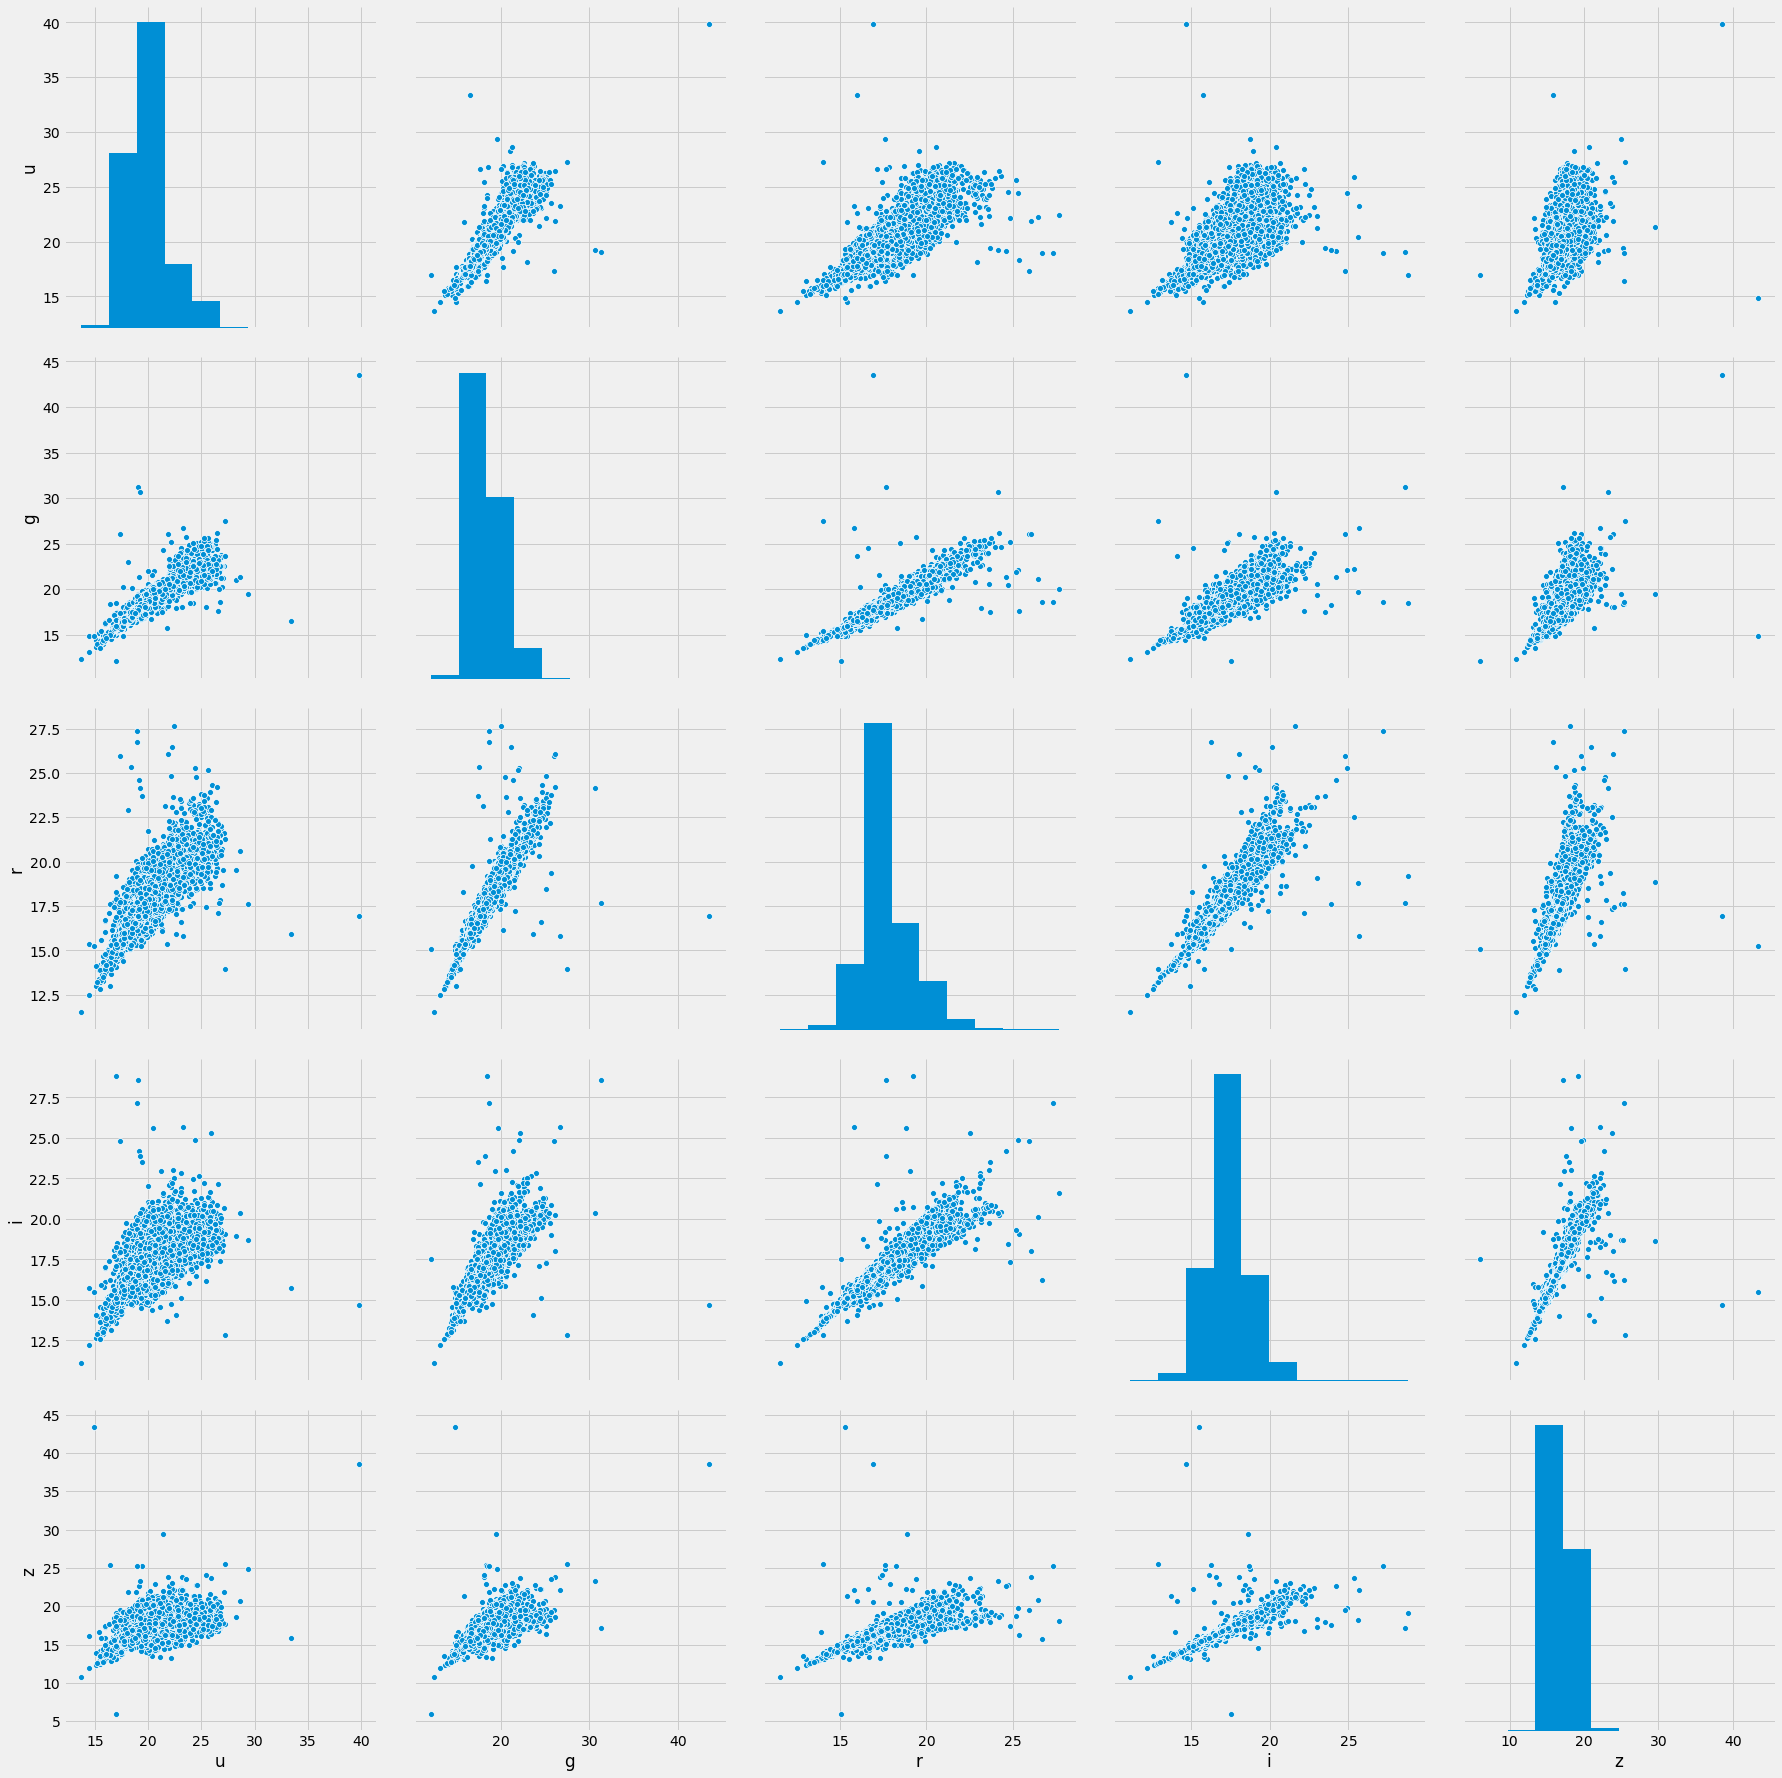

In [37]:
df_sample = df.sample(n=10000, random_state=seed)
sns.pairplot(data=df_sample, vars=['u', 'g', 'r', 'i', 'z'], size=5) 

# 정규화/스케일링

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [58]:
X = df[df['class'] != 0].drop('class', axis=1)
y = df[df['class'] != 0]['class'].values - 1
scaler = StandardScaler()
X = scaler.fit_transform(X[num_cols])

lr = LogisticRegression()
lr.fit(X,y)
pred = lr.predict(X)
get_clf_eval(pred,y)

오차행렬:
 [[ 20511   4855]
 [ 22274 152364]]

정확도: 0.8644


In [59]:
pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)